In [1]:
import numpy as np
import pandas as pd
import pickle
from utils import load_PENN_data_subset, load_PENN_data, decompose_Y, generate_simulation_components, parallel_experiments

In [2]:
# set n_jobs to the number of cores
num_cores = 36
num_experiments = 10000

## Varying N_co

In [4]:
data_dict = {}
RMSE = {}
bias = {}

setting = 'Baseline' 
config = ['log_gdp', 'dem', None]

#TROP_dict = {'Baseline': [0.4, 0.1, 0.1012]}
#TROP_dict = {'Random': [0.4, 0.45, 0.003]}
TROP_dict = {'Baseline': [0.3, 0.4, 0.006]}

for S in np.arange(40,112):    
    print(S)
    
    # load and process data for each setting
    outcome, treatment, option = config
    data = load_PENN_data_subset(outcome, treatment, S)
    data_dict[S] = data
    
    # run simulations
    simulation_components = generate_simulation_components(data)
    np.random.seed(0)
    RMSE[S], bias[S] = parallel_experiments(num_cores, num_experiments, simulation_components, TROP_dict[setting], option)
    #RMSE[S] = r/np.min(r)

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


In [5]:
RMSE

{40: array([0.04970216, 0.04056958, 0.07435239, 0.31327828, 0.08858916,
        0.04370966]),
 41: array([0.04867455, 0.04067196, 0.07356977, 0.31563639, 0.08844635,
        0.04312772]),
 42: array([0.04932198, 0.04148705, 0.07373191, 0.32408745, 0.09070634,
        0.04286353]),
 43: array([0.0524848 , 0.03968291, 0.07255914, 0.33202377, 0.09402012,
        0.04316862]),
 44: array([0.03475604, 0.0609858 , 0.07710405, 0.28996664, 0.08937179,
        0.06896807]),
 45: array([0.03572416, 0.05923595, 0.07660485, 0.2787814 , 0.08692553,
        0.06871779]),
 46: array([0.03645993, 0.05884405, 0.07919947, 0.28598152, 0.08936407,
        0.06943264]),
 47: array([0.03525894, 0.05647925, 0.07654458, 0.27158363, 0.08464082,
        0.06730067]),
 48: array([0.03490979, 0.05593473, 0.0750001 , 0.27520983, 0.08521519,
        0.06572098]),
 49: array([0.03550317, 0.05713029, 0.07630364, 0.28836999, 0.08749646,
        0.06686053]),
 50: array([0.03581059, 0.0531715 , 0.07846616, 0.28068666, 

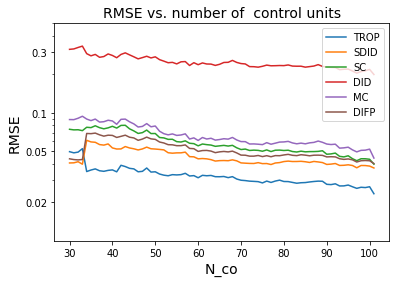

In [6]:
results = np.array(list(RMSE.values()))
estimators = ['TROP','SDID','SC','DID','MC','DIFP']
import matplotlib.pyplot as plt

for e in range(results.shape[1]):
    
    plt.plot(np.array(list(RMSE.keys()))-10, (results[:,e]),label=estimators[e])
    plt.yscale('log')

plt.yticks([0.3,0.1, 0.05, 0.02], labels=[0.3,0.1, 0.05, 0.02])
plt.xlabel('N_co',fontsize=14)
plt.ylabel('RMSE',fontsize=14)
plt.ylim(0.01,0.5)
plt.title('RMSE vs. number of  control units',fontsize=14)
plt.legend()

plt.savefig("PENN_N_10_10_plot.pdf", format="pdf")
    
plt.show()

## Varying N_tr

In [4]:
data_dict = {}
RMSE = {}
bias = {}

setting = 'Baseline' 
config = ['log_gdp', 'dem', 'N_tr=1']

TROP_dict = {'Baseline': [0.3, 0.4, 0.006]}
#TROP_dict = {'Baseline': [0.4, 0.1, 0.1012]}

#TROP_dict={'Random': [0.4, 0.45, 0.003]}

for S in np.arange(10):    
#for S in [48]:
    
    # load and process data for each setting
    outcome, treatment, option = config
    option = 'N_treated='+str(S+1)
    print(option)
    data = load_PENN_data_subset(outcome, treatment, 111-(9-S))
    data_dict[S] = data
    
    # run simulations
    simulation_components = generate_simulation_components(data)
    np.random.seed(0)
    RMSE[S], bias[S] = parallel_experiments(num_cores, num_experiments, simulation_components, TROP_dict[setting], option)
    #RMSE[S] = r/np.min(r)

N_treated=1
N_treated=2
N_treated=3
N_treated=4
N_treated=5
N_treated=6
N_treated=7
N_treated=8
N_treated=9
N_treated=10


In [5]:
RMSE

{0: array([0.08596963, 0.11823792, 0.16527985, 0.33868044, 0.11785429,
        0.145973  ]),
 1: array([0.05558756, 0.08232856, 0.09742271, 0.26767919, 0.07901759,
        0.09219349]),
 2: array([0.04455454, 0.06755275, 0.07949748, 0.2478055 , 0.06832195,
        0.0747744 ]),
 3: array([0.03923971, 0.05926125, 0.06894574, 0.23441984, 0.06306251,
        0.06524469]),
 4: array([0.03465022, 0.05263289, 0.0582849 , 0.22245332, 0.05718409,
        0.056621  ]),
 5: array([0.03074694, 0.04622858, 0.0516604 , 0.21068038, 0.05286334,
        0.0507739 ]),
 6: array([0.02960758, 0.04450086, 0.04959035, 0.21316239, 0.05315152,
        0.04833625]),
 7: array([0.02818802, 0.04223703, 0.04689744, 0.21435477, 0.05216837,
        0.04587557]),
 8: array([0.02724366, 0.03989147, 0.04484531, 0.2184635 , 0.05224927,
        0.04375757]),
 9: array([0.02332541, 0.03706265, 0.03969936, 0.19921791, 0.04429764,
        0.04014475])}

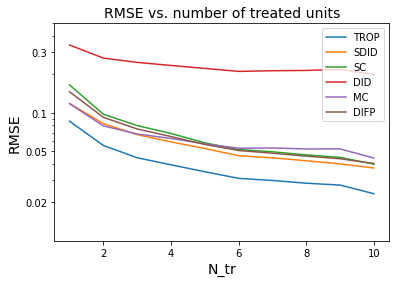

In [6]:
results = np.array(list(RMSE.values()))
estimators = ['TROP','SDID','SC','DID','MC','DIFP']
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

for e in range(results.shape[1]):
    
    plt.plot(np.array(list(RMSE.keys()))+1, (results[:,e]),label=estimators[e])
    plt.yscale('log')

plt.yticks([0.3,0.1, 0.05, 0.02], labels=[0.3,0.1, 0.05, 0.02])
plt.xlabel('N_tr',fontsize=14)
plt.ylabel('RMSE',fontsize=14)
plt.title('RMSE vs. number of treated units',fontsize=14)
plt.ylim(0.01,0.5)
plt.legend(loc='upper right')

plt.savefig("PENN_N_tr_plot.pdf", format="pdf")
    
plt.show()

# Optimal Tuning Parameter

In [4]:
from methods import TROP_TWFE_average
from utils import generate_data
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

In [6]:
np.random.seed(1)
outcome, treatment, option = ['log_gdp', 'dem', 'Random']
data = load_PENN_data_subset(outcome, treatment, 111)
F, M, cov_mat, pi = generate_simulation_components(data)

In [7]:
Y_true, _, _, _ = generate_data(F, M, cov_mat, pi, option)
treated_periods = 1
treated_unit_number = 1

In [11]:
def get_ATE(trial, Y_true, lambda_unit, lambda_time, lambda_nn):
    np.random.seed(trial)
    N_total, _ = Y_true.shape
    test_units = np.random.choice(np.arange(N_total), size=treated_unit_number,replace=False)
    
#     candidates = np.random.binomial(n=1,p=pi)
#     treated_number = np.sum(candidates)

#     if treated_number == 0:
#         index = np.array(np.random.choice(N_total))
#     elif treated_number == 1:
#         index = np.array([np.squeeze(np.argwhere(candidates==1))])
#     else:   
#         index = np.squeeze(np.argwhere(candidates==1))
#         if treated_number > treated_unit_number:
#             index = np.random.choice(index, size=treated_unit_number, replace=False)
#     test_units = index
                
    W_test = np.zeros(Y_true.shape)
    W_test[test_units,-treated_periods:] = 1
    estimate = TROP_TWFE_average(Y_true,W_test, test_units,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
    return estimate

In [12]:
Y_true.shape

(111, 48)

## Select lambda_unit

In [30]:
Q = []
lambda_units = np.arange(0,2,2/10)
for lambda_unit in lambda_units:
    lambda_time = 0.1
    lambda_nn = 0.1012
    print(lambda_unit,lambda_time,lambda_nn)
    ATEs = Parallel(n_jobs=36, prefer='processes')(
                 delayed(get_ATE)(trial,Y_true,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
                 for trial in range(100))
    Q.append(np.sqrt(np.mean(np.square(ATEs))))
    print(np.sqrt(np.mean(np.square(ATEs))))

0.0 0.1 0.1012
0.0571428885249143
0.2 0.1 0.1012
0.05516264607406653
0.4 0.1 0.1012
0.053200056442836346
0.6000000000000001 0.1 0.1012
0.0532053718771911
0.8 0.1 0.1012
0.053667303191907455
1.0 0.1 0.1012
0.05542672721468793
1.2000000000000002 0.1 0.1012
0.05993949118126804
1.4000000000000001 0.1 0.1012
0.06409182664628679
1.6 0.1 0.1012
0.0679907014063442
1.8 0.1 0.1012
0.0728204109313126


In [31]:
lambda_units[np.argmin(Q)]

0.4

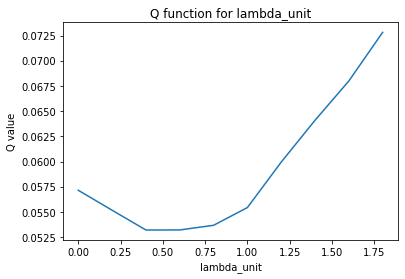

In [32]:
plt.plot(lambda_units,Q)
plt.xlabel('lambda_unit')
plt.ylabel('Q value')
plt.title('Q function for lambda_unit')
plt.show()

## Select lambda_time

In [33]:
Q = []
lambda_times = np.arange(0,0.5,0.5/10)
for lambda_time in lambda_times:
    lambda_nn = 0.1012
    lambda_unit = 0.4
    print(lambda_unit,lambda_time,lambda_nn)
    ATEs = Parallel(n_jobs=36, prefer='processes')(
                 delayed(get_ATE)(trial,Y_true,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
                 for trial in range(100))
    Q.append(np.sqrt(np.mean(np.square(ATEs))))
    print(np.sqrt(np.mean(np.square(ATEs))))

0.4 0.0 0.1012
0.060648509260930135
0.4 0.05 0.1012
0.05627787645661344
0.4 0.1 0.1012
0.053200056442836346
0.4 0.15000000000000002 0.1012
0.058645768727411424
0.4 0.2 0.1012
0.062239566523368074
0.4 0.25 0.1012
0.06080099094772253
0.4 0.30000000000000004 0.1012
0.060344494379283437
0.4 0.35000000000000003 0.1012
0.06005535075661885
0.4 0.4 0.1012
0.061368249417027176
0.4 0.45 0.1012
0.06191279003203617


In [34]:
lambda_times[np.argmin(Q)]

0.1

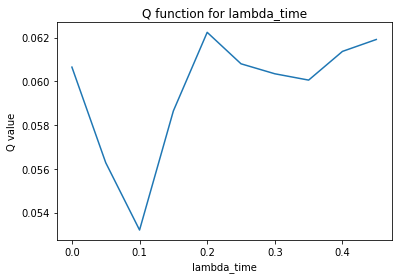

In [35]:
plt.plot(lambda_times,Q)
plt.xlabel('lambda_time')
plt.ylabel('Q value')
plt.title('Q function for lambda_time')
plt.show()

### Select lambad_nn

In [36]:
Q = []
lambda_nns = np.arange(0.001,0.5,0.501/10)
for lambda_nn in lambda_nns:
    lambda_time = 0.1
    lambda_unit = 0.4
    print(lambda_unit,lambda_time,lambda_nn)
    ATEs = Parallel(n_jobs=36, prefer='processes')(
                 delayed(get_ATE)(trial,Y_true,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
                 for trial in range(100))
    Q.append(np.sqrt(np.mean(np.square(ATEs))))
    print(np.sqrt(np.mean(np.square(ATEs))))

0.4 0.1 0.001
0.05918736344951866
0.4 0.1 0.0511
0.0549057595171461
0.4 0.1 0.1012
0.053200056442836346
0.4 0.1 0.1513
0.05356721744650097
0.4 0.1 0.2014
0.054735897841589394
0.4 0.1 0.2515
0.055438002600853124
0.4 0.1 0.3016
0.05809210557548128
0.4 0.1 0.3517
0.06086524131850515
0.4 0.1 0.4018
0.06319888981280196
0.4 0.1 0.45189999999999997
0.06475910295708795


In [37]:
lambda_nns[np.argmin(Q)]

0.1012

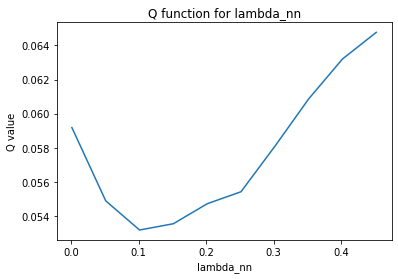

In [38]:
plt.plot(lambda_nns,Q)
plt.xlabel('lambda_nn')
plt.ylabel('Q value')
plt.title('Q function for lambda_nn')
plt.show()